## step1. Titanic - Machine Learning from Disaster

#### dataset load

* import libaray

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### load csv

In [90]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [91]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [115]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,n,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,n,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,n,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,n,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,n,S


#### Search info

In [92]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [93]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [94]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Columns - Has null data

* Age

* Cabin

* Embarked

In [95]:
train_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

#### Visualize

<Axes: xlabel='Survived', ylabel='count'>

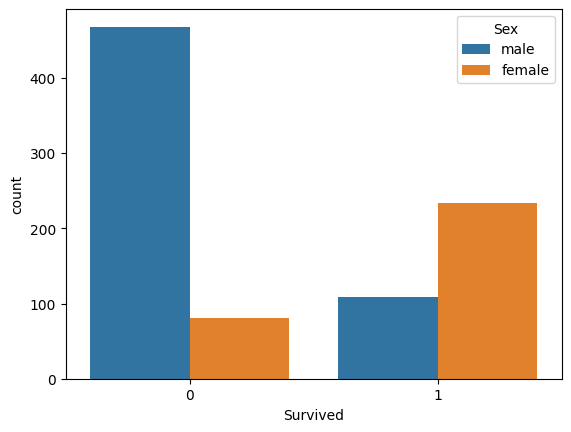

In [96]:
sns.countplot(data=train_df, x='Survived', hue='Sex')

Survived count by Sex: Male < Female
(survived count 0-1: not survived, survived. trade-off)

<Axes: xlabel='Pclass', ylabel='Survived'>

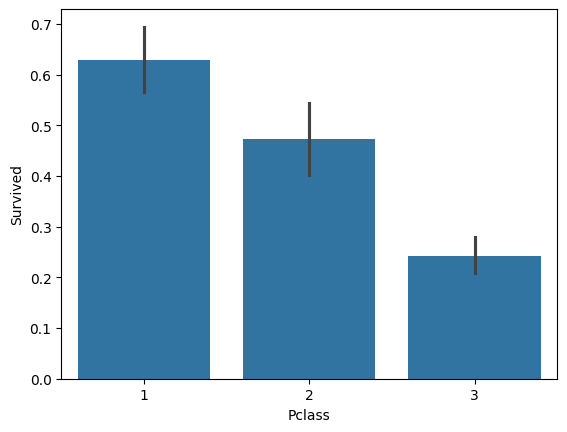

In [97]:
sns.barplot(data=train_df, x='Pclass', y='Survived')

Survived count by Class: 1 > 2 > 3

#### Preprocessing

* missing value

In [117]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [116]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

Age: 평균값 대체 

In [ ]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())

27.0


In [108]:
train_df[train_df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [109]:
test_df[train_df['Age'].isnull()]


C:\Users\User\AppData\Local\Temp\ipykernel_35584\3855985029.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_df[train_df['Age'].isnull()]


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Cabin: 마지막에 있었던 호실을 의미. 해당 데이터가 남아 있다는 의미는 생존 여부를 판단하는데에 영향을 미침 + 어느 객실에 있었는지에 따라 생존 여부에 영향을 미침
-> 가장 앞글자로 대체

In [110]:
train_df['Cabin'].astype(str).str[0].unique()

array(['n', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [111]:
train_df['Cabin'] = train_df['Cabin'].astype(str).str[0]
test_df['Cabin'] = test_df['Cabin'].astype(str).str[0]

In [112]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,n,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,n,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,n,S


In [113]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,n,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,n,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,n,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,n,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,n,S


Embarked: 승선 항구. 논리적으로 따졌을 때 생존 여부에 직접적인 관계는 없어 보임.

In [121]:
train_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Embarked를 Pclass를 통해 전처리: 승선 시기는 승객의 배경(사회,경제)과 연관 있을 것이라고 추측하여 Pclass를 이용해 Embarked를 추정

In [127]:
train_df[train_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B,NaN


<span style="background-color:yellow; color:black">Heatmap을 통한 비율 시각화</span>

In [ ]:
group_counts = train_df.groupby(['Embarked', 'Pclass']).size().unstack()

group_ratios = group_counts.div(group_counts.sum(axis=1), axis=0)

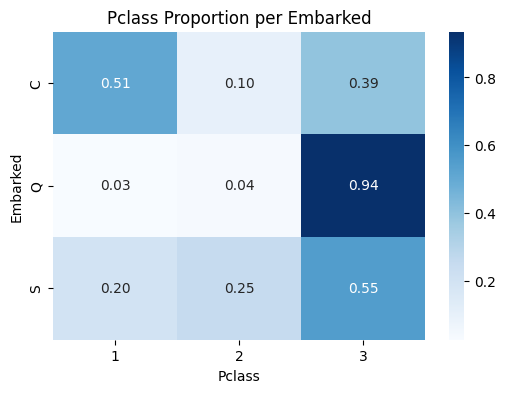

In [133]:
plt.figure(figsize=(6,4))
sns.heatmap(group_ratios, annot=True, cmap='Blues', fmt='.2f')
plt.title('Pclass Proportion per Embarked')
plt.ylabel('Embarked')
plt.xlabel('Pclass')
plt.show()

class 1: C

class 2: S

class 3: Q 

매핑하여 처리

In [140]:
target = train_df['Embarked'].isna()

mapping = {1: 'C', 2: 'S', 3: 'Q'}
train_df.loc[target, 'Embarked'] = train_df.loc[target, 'Pclass'].map(mapping)

In [141]:
target = test_df['Embarked'].isna()

mapping = {1: 'C', 2: 'S', 3: 'Q'}
test_df.loc[target, 'Embarked'] = test_df.loc[target, 'Pclass'].map(mapping)

In [144]:
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [143]:
test_df.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

test 데이터셋의 Fare 값 처리: 데이터가 1개 이기 때문에 직접 데이터들을 확인 후 처리

In [146]:
test_df['Fare'].value_counts()

Fare
7.7500      21
26.0000     19
8.0500      17
13.0000     17
7.8958      11
            ..
13.8625      1
7.7208       1
90.0000      1
108.9000     1
22.3583      1
Name: count, Length: 169, dtype: int64

In [147]:
test_df[test_df['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,n,S


3클래스 승객으로 지불 비용은 많지 않을 것으로 예상. 

In [156]:
test_df[test_df['Pclass'] == 3].describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,218.000000,218.0,218.000000,218.000000,218.000000,217.000000
mean,1094.178899,3.0,25.009541,0.463303,0.417431,12.459678
std,120.188830,0.0,8.726613,1.107591,1.165980,10.803698
min,892.000000,3.0,0.170000,0.000000,0.000000,3.170800
25%,994.250000,3.0,21.250000,0.000000,0.000000,7.750000
50%,1091.500000,3.0,27.000000,0.000000,0.000000,7.895800
75%,1191.750000,3.0,27.000000,1.000000,0.000000,14.400000
max,1309.000000,3.0,60.500000,8.000000,9.000000,69.550000


<Axes: xlabel='Pclass', ylabel='Fare'>

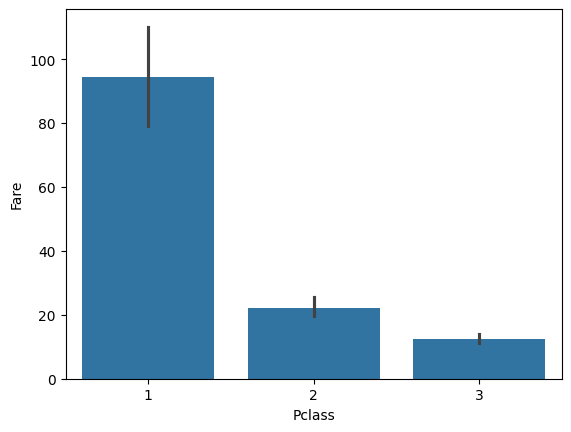

In [150]:
sns.barplot(data=test_df, x='Pclass', y='Fare')

중앙값으로 대체

In [158]:
test_df['Fare'] = test_df['Fare'].fillna(test_df.loc[test_df['Pclass'] == 3, 'Fare'].median())

In [159]:
test_df.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [160]:
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64